> I chose the data set, cars_hw.csv

> 1. Clean the data and perform some EDA and visualization to get to know the data set.

In [61]:
from google.colab import files
uploaded = files.upload()

Saving cars_hw.csv to cars_hw.csv


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import io

In [72]:
df = pd.read_csv(io.BytesIO(uploaded['cars_hw.csv']), low_memory=False)
print(df.shape)
df.head()

df.columns = df.columns.str.strip().str.lower()
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage_run'] = pd.to_numeric(df['mileage_run'], errors='coerce')
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
df.dropna(inplace=True)
categorical_columns = ['make', 'color', 'body_type', 'fuel_type', 'transmission', 'transmission_type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

print(df.info())
print(df.head())

(976, 12)
Missing values per column:
 unnamed: 0           0
make                 0
make_year            0
color                0
body_type            0
mileage_run          0
no_of_owners         0
seating_capacity     0
fuel_type            0
transmission         0
transmission_type    0
price                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   unnamed: 0         976 non-null    int64   
 1   make               976 non-null    category
 2   make_year          976 non-null    int64   
 3   color              976 non-null    category
 4   body_type          976 non-null    category
 5   mileage_run        976 non-null    int64   
 6   no_of_owners       976 non-null    object  
 7   seating_capacity   976 non-null    int64   
 8   fuel_type          976 non-null    category
 9   transmission       976 n

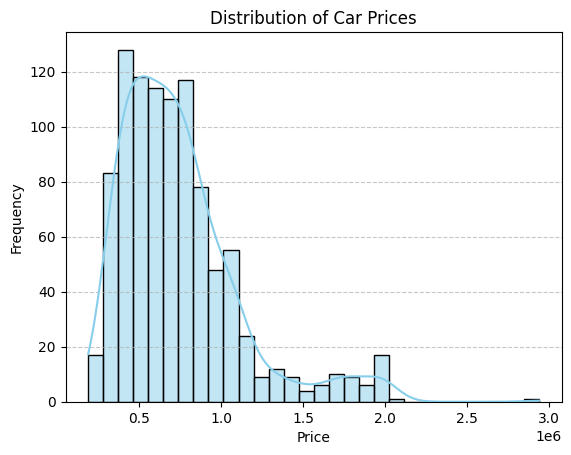

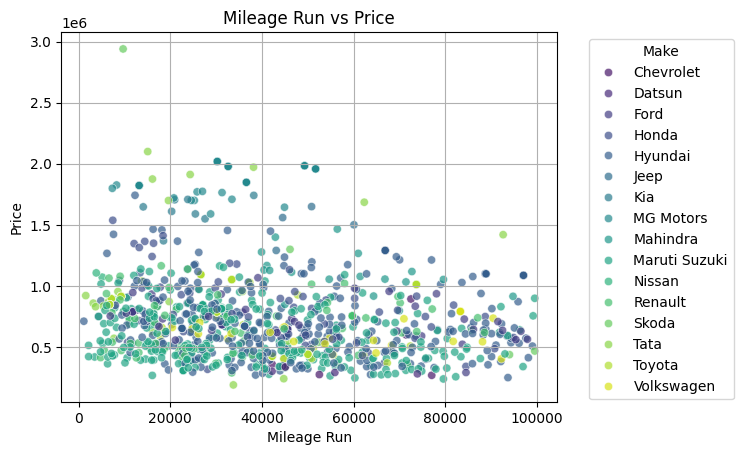

<ipython-input-75-760c968fc4a7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make_year', y='price', data=df, palette='coolwarm')


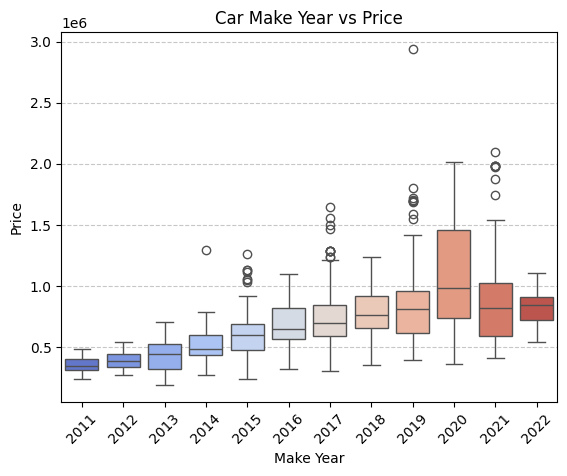

In [75]:
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sns.scatterplot(x='mileage_run', y='price', data=df, hue='make', palette='viridis', alpha=0.7)
plt.title('Mileage Run vs Price')
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

sns.boxplot(x='make_year', y='price', data=df, palette='coolwarm')
plt.title('Car Make Year vs Price')
plt.xlabel('Make Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [67]:
pd.set_option('future.no_silent_downcasting', True)
df['No_of_Owners'] = df['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd': 3})
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000


In [68]:
cat_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission_Type']
encoded_df = pd.get_dummies(df, columns=cat_vars, drop_first=True, dtype='int')
encoded_df.head()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Transmission,Price,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Color_yellow,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,No_of_Owners_2,No_of_Owners_3,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_Type_Manual
0,1,2017,44611,5,7-Speed,657000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,2016,20305,5,5-Speed,682000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,3,2019,29540,5,5-Speed,793000,0,0,1,0,...,0,0,0,0,1,1,0,1,0,1
3,4,2017,35680,5,5-Speed,414000,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,5,2017,25126,5,5-Speed,515000,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


> 3. Implement an 80/20 train-test split. Put the test data aside.

In [76]:
from sklearn.model_selection import train_test_split

y = encoded_df['Price']
X = encoded_df.drop(columns=['Transmission', 'Price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=100
)

> 4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [81]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_train_pred_simple = simple_model.predict(X_train)
y_test_pred_simple = simple_model.predict(X_test)

simple_model_results = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_simple)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_simple)),
    'Train R^2': r2_score(y_train, y_train_pred_simple),
    'Test R^2': r2_score(y_test, y_test_pred_simple)
}

print(simple_model_results)

{'Train RMSE': 152519.95541401798, 'Test RMSE': 138005.4862230456, 'Train R^2': 0.8265740183937349, 'Test R^2': 0.8612947063233363}


This model was the best

> 5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [82]:
expander = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly =  expander.fit_transform(X_train)
X_test_poly = expander.transform(X_test)
complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train)
y_train_pred_poly = complex_model.predict(X_train_poly)
y_test_pred_poly = complex_model.predict(X_test_poly)

complex_model_results = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_poly)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_poly)),
    'Train R^2': r2_score(y_train, y_train_pred_poly),
    'Test R^2': r2_score(y_test, y_test_pred_poly)
}
print(complex_model_results)

{'Train RMSE': 79436.08511430337, 'Test RMSE': 1748876.7672425678, 'Train R^2': 0.9529568399615526, 'Test R^2': -21.27505320456273}


The complex model has a higher train $R^2$ but lower train $R^2$. The RMSE for the complex model was lower for the train but higher for the test.

> 6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

The dataset was cleaned by standardizing column names, handling missing values, and converting data types where necessary. Visualizations such as histograms and scatter plots were used to understand the distribution of variables like Price and Mileage_Run. Categorical variables were transformed into dummy variables to prepare them for regression analysis. This included variables like Make, Color, and Body_Type. An 80/20 train-test split was implemented to separate the data into training and testing sets, ensuring that models could be evaluated on unseen data. Without regularization, a complex model tends to overfit by capturing noise instead of patterns. While omplexity can enhance training performance, it reduces generalization without proper controls. Although no models in this scenario exhibit underfitting, simple models with poor training performance would suggest a lack of complexity. However, a straightforward approach with moderate regularization and a solid baseline proves successful.

> 7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

Was a little busy this week so did not do this part